## ERP peak analysis

Extract the study-relevant ERP peak subjectwise (e.g. one value per subject) and statistically test them. 
* Example RQ: On which ERP-peaks do we find major difference between the conditions?

In [ ]:
# general purpose
import numpy as np
import pandas as pd

# i/O
from scipy import io
from pathlib import Path
import datetime
import traceback
import logging
import pickle
import pkg_resources

# plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# testing
import unittest

# EEG stuff
import mne
import osfclient 
import mne_bids 
from mne_bids import (BIDSPath, read_raw_bids)

# EEG utils 
import ccs_eeg_utils
import ccs_eeg_semesterproject

import configuration

In [3]:
mne.set_log_level('WARNING')

P3: The task for the participants was to press the letters A,B,C,D,E when the corresponding letter was shown as a stimupli randomly with $p = 0.2$. One letter was designated the target for a given block of trials, and the other 4 letters were non-targets. Thus, the probability of the target category was $0.2$, but the same physical stimulus served as a target in some blocks and a nontarget in others. Participants responded whether the letter presented on each trial was the target or a non-target for that block. There were 34 participants.

We can cross-check the results with the published results:
- time window of stat. significant difference: $253.91 - 664.06$
- recommended measurement window: $300 - 600$

/tmp/ipykernel_573535/3069254588.py:29: RuntimeWarning: Data file name in EEG.data (sub-003_task-P3_eeg.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-003_ses-P3_task-P3_eeg.fdt).
  raw = read_raw_bids(bids_path)
/tmp/ipykernel_573535/3069254588.py:29: RuntimeWarning: Participants file not found for sub-003_ses-P3_task-P3_eeg.set... Not reading in any particpants.tsv data.
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 sec)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 77 samples (0.301 sec)

Data/p3/sub-003/ses-P3/eeg/sub-003_ses-P3_task-P3_


/home/work/Dokumente/Studium/SimTech_MSc/14. Semester/Signal_Processing_and_Analysis_of_Human_Brain_Potentials_EEG/Ostertag_SS2022_EEGSemesterProject/ccs_eeg_semesterproject.py:64: UserWarning: loadtxt: Empty input file: "Data/p3/sub-003/ses-P3/eeg/sub-003_ses-P3_task-P3_badChannels.tsv"
  badChannels = np.loadtxt(fn+'badChannels.tsv',delimiter='\t')
/home/work/Dokumente/Studium/SimTech_MSc/14. Semester/Signal_Processing_and_Analysis_of_Human_Brain_Potentials_EEG/Ostertag_SS2022_EEGSemesterProject/ccs_eeg_semesterproject.py:96: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = mne.preprocessing.ica.ICA(method='imported_eeglab', n_components=n_components)


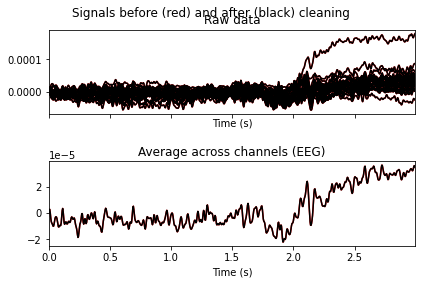

/home/work/.local/lib/python3.8/site-packages/mne/annotations.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return Annotations(onset=self.onset[key],
/home/work/.local/lib/python3.8/site-packages/mne/annotations.py:315: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  duration=self.duration[key],
/home/work/.local/lib/python3.8/site-packages/mne/annotations.py:316: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted 

[(0, ('IGNORED',)), (1, ('IGNORED',)), (3, ('IGNORED',)), (5, ('IGNORED',)), (7, ('IGNORED',)), (9, ('IGNORED',)), (11, ('IGNORED',)), (13, ('IGNORED',)), (15, ('IGNORED',)), (17, ('IGNORED',)), (19, ('IGNORED',)), (21, ('IGNORED',)), (23, ('IGNORED',)), (25, ('IGNORED',)), (27, ('IGNORED',)), (29, ('IGNORED',)), (31, ('IGNORED',)), (33, ('IGNORED',)), (35, ('IGNORED',)), (37, ('IGNORED',)), (39, ('IGNORED',)), (41, ('IGNORED',)), (43, ('IGNORED',)), (45, ('IGNORED',)), (47, ('IGNORED',)), (49, ('IGNORED',)), (51, ('IGNORED',)), (53, ('IGNORED',)), (55, ('IGNORED',)), (57, ('IGNORED',)), (59, ('IGNORED',)), (61, ('IGNORED',)), (63, ('IGNORED',)), (65, ('IGNORED',)), (67, ('IGNORED',)), (69, ('IGNORED',)), (71, ('IGNORED',)), (73, ('IGNORED',)), (75, ('IGNORED',)), (77, ('IGNORED',)), (79, ('IGNORED',)), (81, ('IGNORED',)), (83, ('IGNORED',)), (85, ('IGNORED',)), (87, ('IGNORED',)), (89, ('IGNORED',)), (91, ('IGNORED',)), (93, ('IGNORED',)), (95, ('IGNORED',)), (97, ('IGNORED',)), (99, 

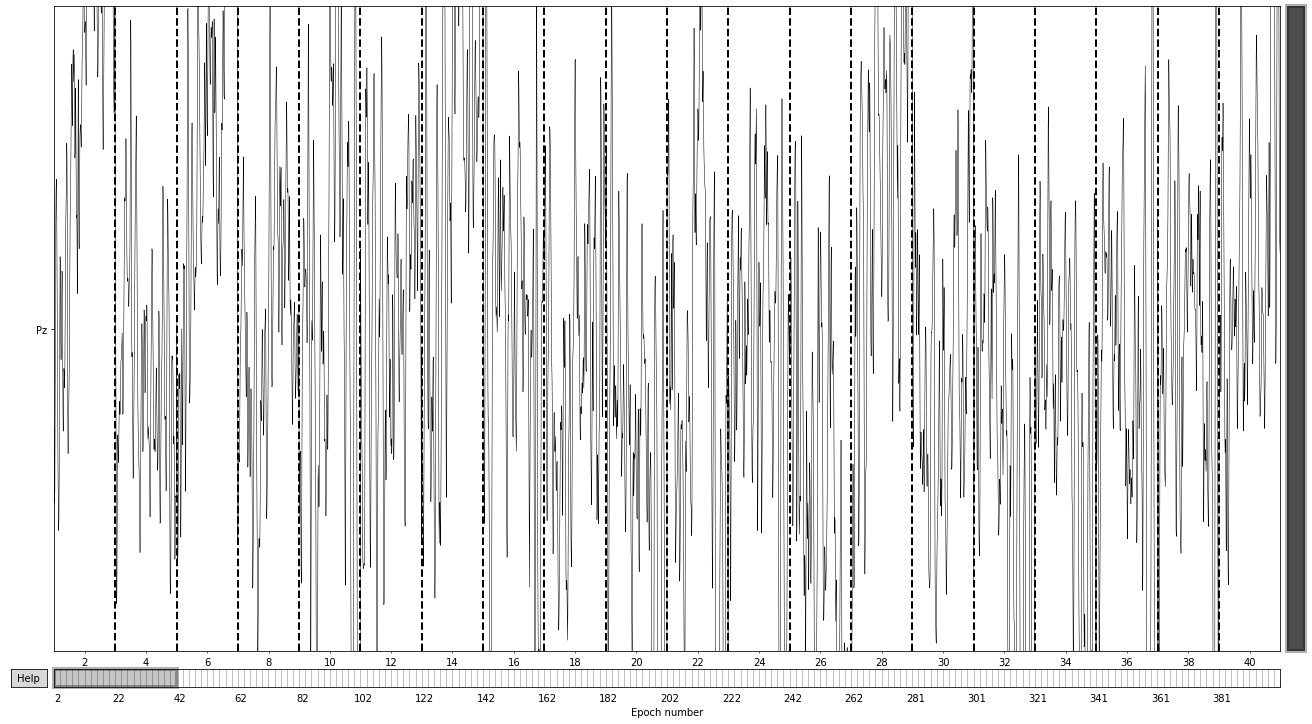

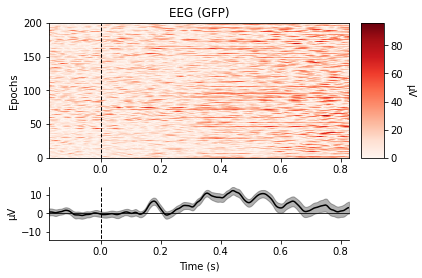

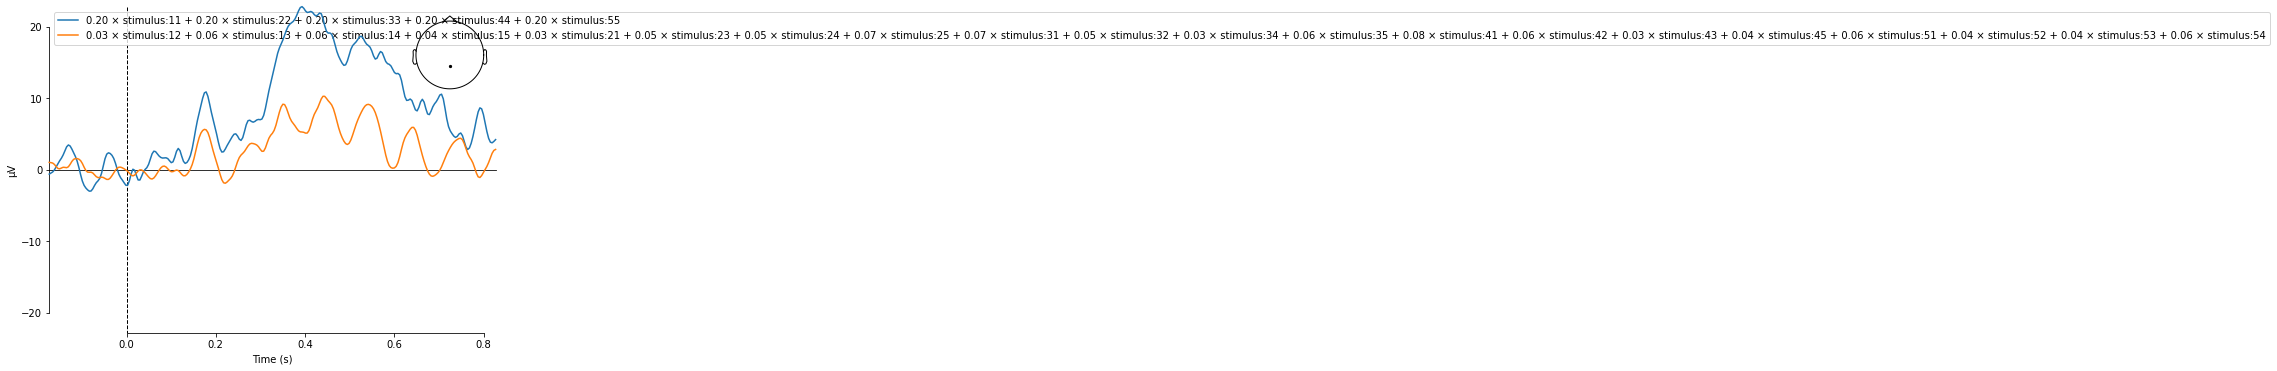

NameError: name 'start_idx' is not defined

In [13]:
# subject_ids = [path.stem.replace('sub-', '') for path in Path(configuration.fname.bids_root).glob('sub-*')]

subject_ids = ['003', '005']

columns_evoked = ['subject_id', 'no_trials', 'accuracy',
                  'avg_peak_value_target', 'avg_peak_value_distractor',
                  'avg_peak_time_target', 'avg_peak_time_distractor', 
                  'target_evd_path', 'distractor_evd_path', # paths to saved evoked data
                  'mean_response_time', ]
evoked_metadata_dump = []

epochs_dump = []
evoked_target_dump = []
evoked_distractor_dump = []

visualize = True  # debug

for subject in subject_ids:
    evoked_local = pd.DataFrame(index=[0],
                                columns=columns_evoked)
    evoked_local['subject_id'] = int(subject)

    # visualize every fifth subject
    if np.random.randint(1, 6) == 5:
        visualize = True

    ##################
    ### Processing ###
    ##################
    # read data
    bids_path = BIDSPath(subject=subject, task="P3", session="P3",
                         datatype='eeg', suffix='eeg',
                         root=configuration.fname.bids_root)

    raw = read_raw_bids(bids_path)
    ccs_eeg_utils.read_annotations_core(bids_path, raw)
    raw.load_data()

    # add channel locations
    raw.set_montage('standard_1020', match_case=False)

    # downsample
    raw.resample(configuration.resampling_freq)

    # filter
    raw = raw.filter(l_freq=configuration.high_pass_cutoff_freq,
                     h_freq=None,
                     fir_design='firwin',
                     verbose=True)
    raw = raw.filter(l_freq=None,
                     h_freq=configuration.low_pass_cutoff_freq,
                     fir_design='firwin',
                     verbose=True)

    # bad channels
    annotations, badChannels = ccs_eeg_semesterproject.load_precomputed_badData(bids_root=configuration.fname.bids_root,
                                                                                subject_id=subject,
                                                                                task='P3')
    if len(badChannels) > 0:
        raw.info['bads'] = [badChannels]
        raw.interpolate_bads()

    # ICA
    ica, badcomp = ccs_eeg_semesterproject.load_precomputed_ica(bids_root=configuration.fname.bids_root,
                                                            subject_id=subject,
                                                            task='P3')
    ica.exclude = badcomp
    ica.apply(raw)

    # check the excluded
    if visualize:
        ica.plot_overlay(raw, exclude=badcomp)

    # rereference
    raw.set_eeg_reference(['P9', 'P10'])

    # event stats
    ## accuracy and number of trials
    n_correct_resp = np.count_nonzero(raw.annotations.description == 'response:201')
    n_wrong_resp = np.count_nonzero(raw.annotations.description == 'response:202')
    evoked_local['no_trials'] = (n_wrong_resp+n_correct_resp)
    evoked_local['accuracy'] = (n_correct_resp / evoked_local['no_trials']) * 100

    ## mean response time of correct responses
    correct_responses = np.where(raw.annotations.description == 'response:201')
    start_stimuli = [raw.annotation.onset[response -1] for response in correct_responses]
    start_responses = [raw.annotation.onset[response] for response in correct_responses]
    response_times = [start_responses[i] - start_stimuli[i] - configuration.monitor_delay for i in range(len(correct_responses))] 
    mean_response_time = np.mean(response_times)
    evoked_local['mean_response_time'] = mean_response_time

    # reject subject if the error rate is > 25%
    if (evoked_local['accuracy']) < 75:
        print(f"Subject {subject} was excluded due to an error rate of {evoked_local['accuracy']} %.")
        continue

    ##############
    ### Events ###
    ##############
    # convert annotations to events
    evts, evts_dict = mne.events_from_annotations(raw)
    wanted_keys = [e for e in evts_dict.keys() if "stimulus" in e]
    evts_dict_stim = dict((k, evts_dict[k])
                          for k in wanted_keys if k in evts_dict)

    # epochs = (n_epochs, n_channels, n_times)
    epochs = mne.Epochs(raw, evts, evts_dict_stim,
                        tmin=configuration.tmin, tmax=configuration.tmax,
                        reject_by_annotation=True,
                        preload=True,  # makes life easier
                        picks=configuration.pick)

    # shift epochs with monitor delay
    epochs.shift_time(configuration.monitor_delay)

    # exclude wrong trials
    wrong_trials = np.where(raw.annotations.description == 'response:202')
    for b in wrong_trials:
        raw.annotations.append(onset=raw.annotations[wrong_trials].onset,
                               duration=raw.annotations[wrong_trials].duration,
                               description='bad-response')

    # TODO # reject based on fewer than 50% of trials remained in any single experimental condition
    # TODO # participants were excluded from the error-related negativity (ERN) analysis if fewer than 6 error trials remained after artifact rejection
    # TODO # reject based on amplitude: https://mne.tools/stable/auto_tutorials/preprocessing/20_rejecting_bad_data.html#tut-reject-epochs-section

    print([(i, a_) for i, a_ in enumerate(epochs.drop_log) if a_ != ()])

    if visualize:
        epochs.plot(block=True)
        # target and distractor seperately? # order=sort_order -> latency/intensity pattern
        epochs.plot_image()

    # TODO # include stimulus and response etc. in the epochs
#     epochs.metadata['stimulus'] =
#     metadata, events, event_id = mne.epochs.make_metadata(
#         events=evts, event_id=evts_dict_stim,
#         tmin=-0.2, tmax=0.8,
#         sfreq=raw.info['sfreq'])

    df_epochs_local = epochs.to_data_frame(index=['condition', 'epoch', 'time'],
                              time_format=None,)
    df_epochs_local['subject_id'] = subject
    epochs_dump.append(df_epochs_local)

    ##############
    ### Evoked ###
    ##############
    # target vs distractor (n_channels, n_times)
    # TODO # equalize_event_counts
    target = epochs[[f"stimulus:{k}{k}" for k in [1, 2, 3, 4, 5]]].average()
    distractor = epochs[[f"stimulus:{k}{j}" for k in [1, 2, 3, 4, 5] for j in [1, 2, 3, 4, 5] if k != j]].average()

    if visualize:
        mne.viz.plot_compare_evokeds([target, distractor])

    # save evoked objects for later combination
    evoked_target_dump.append(target)
    evoked_distractor_dump.append(target)

    # further meta-data and data saving
    target_ch = target.pick_channels(ch_names = [configuration.pick])
    distractor_ch = distractor.pick_channels(ch_names = [configuration.pick])
    filepath_target = f"{configuration.path_results}{subject}_target_evoked-ave.fif"
    filepath_distractor = f"{configuration.path_results}{subject}_target_evoked-ave.fif"
    mne.write_evokeds(filepath_target, target_ch)
    mne.write_evokeds(filepath_distractor, distractor_ch)
    evoked_local['target_erp'] = filepath_target
    evoked_local['distractor_erp'] = filepath_distractor

    _, evoked_local['avg_peak_time_target'], evoked_local['avg_peak_value_target'] = target.get_peak()
    _, evoked_local['avg_peak_time_distractor'], evoked_local['avg_peak_value_distractor'] = distractor.get_peak()

    ############
    ### Save ###
    ############
    evoked_metadata_dump.append(evoked_local)

evoked = pd.concat(evoked_metadata_dump, ignore_index=True)
evoked_target_combined = mne.combine_evoked(evoked_target_dump, weights='nave')
evoked_distractor_combined = mne.combine_evoked(evoked_distractor_dump, weights='nave')

**Sanity checks:** Apart from visualizing the results when developing this function, I randomly visualize every 5th subject for sanity checking. While doing so: . The drop log with all the epochs rejected.

**Processing:** For the preprocessing, I applied the same pipeline as for the three select subjects.

**Events:** Here, it was important to exclude all subjects with too high an error rate. As described in the ERP core paper this is for adults when they get more than 25% of the trials wrong. Special care has to be taken to account for the delay in the LCD monitor used in the experiment. The experimentators documented this delay to be approximately 26ms. For better comparison to the results by ERP core I tried to choose parameters such as the window of the epoch to be the same as they did. The default baseline correction is over the interval $[-0.2s, 0s]$, which is the same as described in the paper. Furthermore, they specifically refered to the Pz-channel to see the greatest effect - so I only used this channel.

**Averages:** Because of the experimental condition the distractor is 4x more likely than the target. To average over the same number of epochs regardless, I equalize the event counts

**Research Hypothesis:** I wanted to investigate effects the relative frequency of the different letters in the english language have. The letter 'e' is more than eight times more likely than 'b' in plain english texts [https://cs.wellesley.edu/~fturbak/codman/letterfreq.html]. I would expect some kind of learned prior proportional to the increased relative frequency when selecting a response. (Humans would err on the side of the more frequent letters. - not so easily testable) Alternatively, through some kind of mere exposure effect the response time should favor the more frequent letters.

* [ ] intuitive check: baseline ok, negative up, difference starts too early, variability, difference - plot multiple electrodes via topoography, 'this seems corect/wrong, because'

In [ ]:
mne.viz.plot_compare_evokeds([evoked_target_combined, evoked_distractor_combined])

evoked_target_grand_avg = mne.grand_average(evoked_target_dump)
evoked_distractor_grand_avg = mne.grand_average(evoked_distractor_dump)

print(f"The peak of the rare condition is at {evoked_target_grand_avg.get_peak()}s.")
print(f"The peak of the frequent condition is at {evoked_distractor_grand_avg.get_peak()}s.")

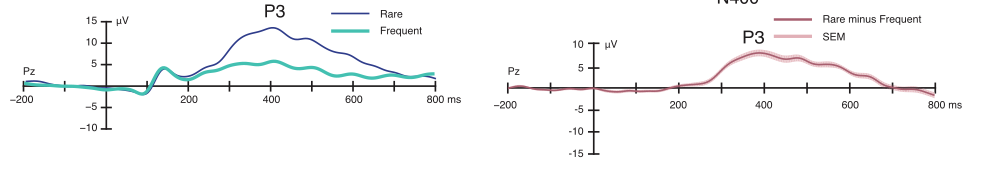

In [ ]:
evoked_difference_grand_avg = evoked_target_grand_avg - evoked_distractor_grand_avg

mean_amp = evoked_difference_grand_avg.data.mean(axis=1)

The documented ERP difference waveform (standard deviation in parentheses), averaged across all participants, reported by Kappenman et al. (2021) is reported to be the following:
- mean amplitude ($\mu V$): $6.29 (3.39)$
- peak amplitude ($\mu V$): $10.15 (4.53)$
- peak latency (ms): $408.89 (70.48)$
- onset latency (ms): $327.44 (61.98)$

In [ ]:
# permutation t-test
# data: (n_samples, n_tests)

T0, p_values, H0 = mne.stats.permutation_t_test(data, configuration.n_permutations, n_jobs = 1)
significant_sensors = picks[p_values <= 0.05]

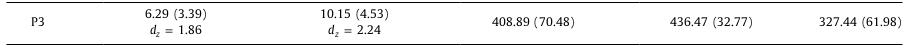

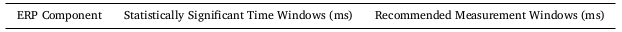